Implement e-mail spam filtering using text classification algorithm with appropriate dataset.

# Assignment 4

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Libraries for visualisation

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the stopwords dataset

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khair\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Load the dataset**

In [3]:
df = pd.read_csv('email_spam.csv' )

In [4]:
# Display the first few rows of the dataset
df.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


# **Exploring the Dataset**

In [5]:
# Displaying the data

df


,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam
...,...,...,...
79,Your application for the position of Child Pr...,"Dear Maryam, \n\n \n\nI would like to thank yo...",not spam
80,Your Kilimall Account is Ready - Shopping Now!,"Dear Customer,\n\nWelcome to Kilimall, Thanks ...",not spam
81,Your Steam account: Access from new web or mob...,"Dear vladis163rus,\nHere is the Steam Guard co...",not spam
82,Your uploaded document is rejected,View In Browser | Log in\n \n \n\nSkrill logo\...,not spam


In [6]:
# Consice information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   84 non-null     object
 1   text    84 non-null     object
 2   type    84 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [7]:
df.shape

(84, 3)

In [8]:
df.describe()

,title,text,type
count,84,84,84
unique,78,82,2
top,English,Model Casting Call\nThank you for taking the t...,not spam
freq,3,2,58


In [9]:
df.isnull().sum()

title    0
text     0
type     0
dtype: int64

In [10]:
df.columns

Index(['title', 'text', 'type'], dtype='object')

**Data Visualisation**

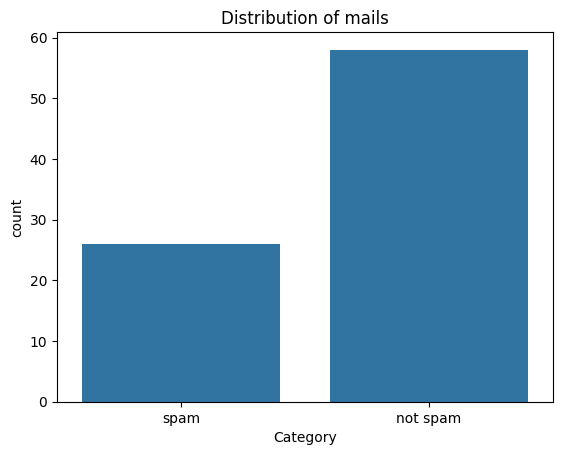

In [11]:
sns.countplot(data=df, x='type')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

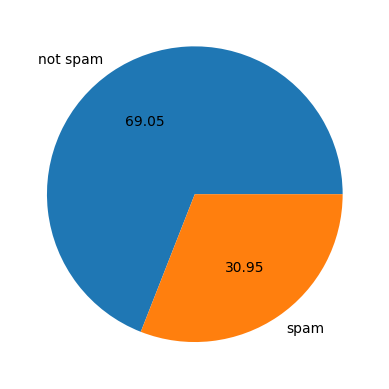

In [12]:
plt.pie(df['type'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')
plt.show()

# **Data Preprocessing**

**Label Encoding**

In [13]:
df.loc[df["type"] == "spam", "type"] = 0
df.loc[df["type"] == "not spam", "type"] = 1

In [14]:
# Separate the feature (message) and target (category) data

X = df["text"]
Y = df["type"]

In [15]:
print(X)

0     Hi James,\n\nHave you claim your complimentary...
1     \nalt_text\nCongratulations, you just earned\n...
2     Here's your GitHub launch code, @Mortyj420!\n ...
3     Hello,\n \nThank you for contacting the Virtua...
4     Hey Prachanda Rawal,\n\nToday's newsletter is ...
                            ...                        
79    Dear Maryam, \n\n \n\nI would like to thank yo...
80    Dear Customer,\n\nWelcome to Kilimall, Thanks ...
81    Dear vladis163rus,\nHere is the Steam Guard co...
82    View In Browser | Log in\n \n \n\nSkrill logo\...
83    You've received a gift!\nSign in to your Bard ...
Name: text, Length: 84, dtype: object


In [16]:
print(Y)

0     0
1     1
2     1
3     1
4     0
     ..
79    1
80    1
81    1
82    1
83    1
Name: type, Length: 84, dtype: object


**Splitting the data into training data and test data**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [18]:
# Print the shape of X
print(X.shape)


(84,)


In [19]:
# Print the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(67,)
(17,)


# **Feature Extraction**

**TF-IDF Vectorizer**

In [20]:
# Initialize TF-IDF Vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [21]:
# Feature extraction for training and testing data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [22]:
# Convert Y_train and Y_test to integer type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")


In [23]:
print(X_train)


65    Dear sir,\nPlease, I would like to inform you ...
17    Dear Joseph Alex Eze\n \nWe are pleased to inf...
35    Bolt rides are not only affordable, but they a...
54    As a Snapchat+ subscriber, you now have access...
59    Netflix\nLearn more about your new account\nHe...
                            ...                        
0     Hi James,\n\nHave you claim your complimentary...
72    Hi Walid,\n\nDo you listen to music on Spotify...
56    This is an automated message to let you know w...
3     Hello,\n \nThank you for contacting the Virtua...
24    Share your Respondent feedback\nYour feedback ...
Name: text, Length: 67, dtype: object


In [24]:
print(X_train_features)

  (0, 1806)	0.21649168842974859
  (0, 1507)	0.2089445212836664
  (0, 1964)	0.32423151338448297
  (0, 1548)	0.32423151338448297
  (0, 1220)	0.202117278144097
  (0, 1059)	0.29518730338142285
  (0, 517)	0.32423151338448297
  (0, 1418)	0.24553589843280868
  (0, 1127)	0.32423151338448297
  (0, 1725)	0.29518730338142285
  (0, 935)	0.2585959262322805
  (0, 1069)	0.19015088739973815
  (0, 1663)	0.2585959262322805
  (0, 547)	0.2089445212836664
  (1, 1275)	0.11744316965621353
  (1, 1268)	0.11744316965621353
  (1, 1658)	0.08493836738783926
  (1, 1230)	0.11744316965621353
  (1, 434)	0.09366864102715829
  (1, 186)	0.23488633931242706
  (1, 1464)	0.11744316965621353
  (1, 637)	0.05522620310890724
  (1, 1527)	0.0994584330271906
  (1, 689)	0.11744316965621353
  (1, 149)	0.0994584330271906
  :	:
  (66, 1070)	0.4406996940408419
  (66, 1188)	0.14689989801361397
  (66, 1185)	0.14689989801361397
  (66, 1543)	0.4406996940408419
  (66, 2001)	0.26748161712599283
  (66, 336)	0.13374080856299642
  (66, 1390)	0.

# **Model Selection and Training**

**Logistic Regresion**

In [25]:
# Create and Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_features, Y_train)


LogisticRegression()

**Evaluating the trained model**

In [26]:
 #Make predictions on the training data
predict_train_data=model.predict(X_train_features)

In [27]:
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.7164179104477612


In [28]:
# Make predictions on the testing data
predict_test_data=model.predict(X_test_features)

In [29]:
#Model Evaluation
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.7058823529411765


**Test the model with an email messages**


In [30]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Not Spam Mail")
else:
    print("Spam Mail")

[1]
Not Spam Mail


**Confusion Matrix**

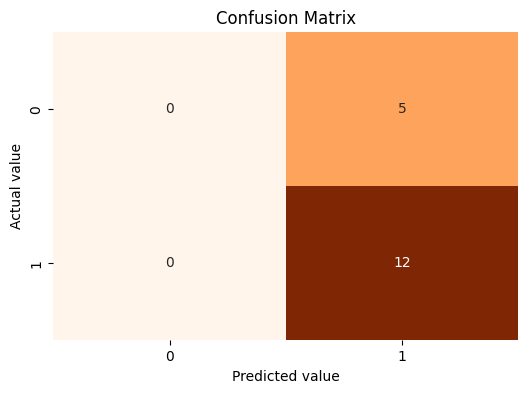

In [31]:
conf_matrix=confusion_matrix(Y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

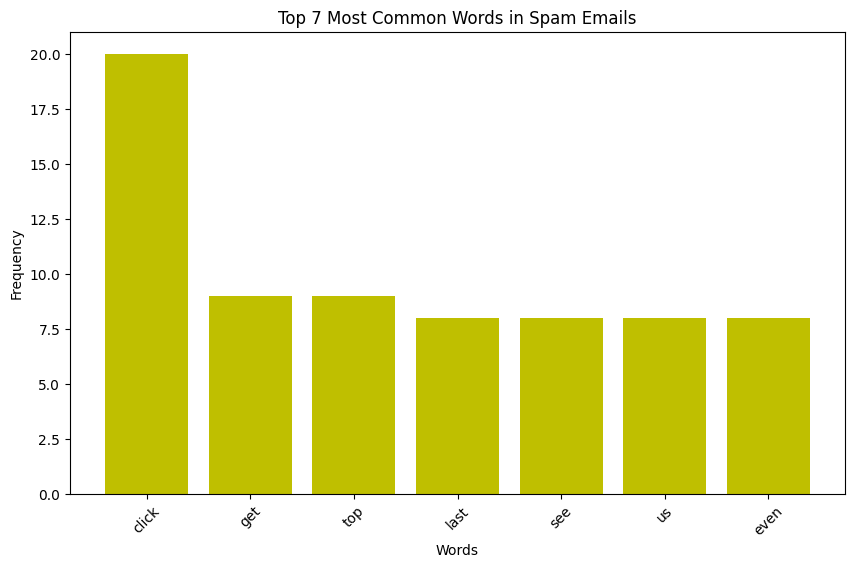

In [32]:
# Data visualization - Top 7 Most Common Words in Spam Emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['type'] == 0]['text']).split()
ham_words = " ".join(df[df['type'] == 1]['text']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(7)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()